<a href="https://colab.research.google.com/github/reeennico/Processamento-Digital-de-Sinais/blob/main/Cap_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capítulo 7: Projeto de Filtros FIR

## Resumo

Os filtros de Resposta ao Impulso Finita (FIR) são amplamente empregados no processamento de sinais devido à sua estabilidade garantida e à possibilidade de obter resposta de fase linear. Diferente dos filtros IIR, os FIR não utilizam realimentação, o que simplifica sua análise e implementação.

Neste capítulo, serão abordados os principais métodos para o projeto de filtros FIR, incluindo:
- **Técnica das Janelas**
- **Amostragem no Domínio da Frequência**
- **Aproximação Ótima (Parks-McClellan)**

---

## 1. Características dos Filtros FIR

Os filtros FIR possuem propriedades essenciais que os tornam adequados para diversas aplicações:

- **Estabilidade garantida**: Como não há realimentação, não há risco de instabilidades.
- **Resposta de fase linear**: Essencial para aplicações onde a forma do sinal deve ser preservada.
- **Alta flexibilidade**: Podem ser ajustados para atingir respostas de frequência bastante precisas.
---

## 2. Técnica das Janelas

Um dos métodos mais utilizados para projetar filtros FIR é a aplicação de janelas a uma resposta ao impulso ideal truncada. Diferentes tipos de janelas podem ser escolhidos, cada uma com características específicas:

- **Janela Retangular**: Alta resolução espectral, porém com ripple significativo.
- **Janela de Hamming**: Boa atenuação dos lóbulos laterais, reduzindo distorções indesejadas.
- **Janela de Hanning**: Menos ripple do que a retangular, proporcionando uma transição mais suave.
- **Janela de Blackman**: Excelente atenuação fora da banda, mas com uma transição de banda mais lenta.

---

### Implementação em Python:

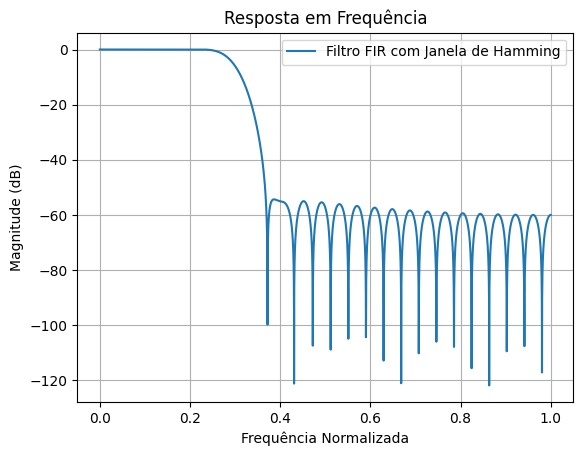

In [ ]:
from scipy.signal import firwin, freqz
import numpy as np
import matplotlib.pyplot as plt

# Definição do filtro FIR
num_taps = 51  # Número de coeficientes do filtro
cutoff = 0.3  # Frequência de corte normalizada
b = firwin(num_taps, cutoff, window='hamming')

# Resposta em frequência do filtro
w, h = freqz(b, worN=8000)

# Plotando a resposta
plt.figure()
plt.plot(w / np.pi, 20 * np.log10(abs(h)), label='Filtro FIR com Janela de Hamming')
plt.title('Resposta em Frequência')
plt.xlabel('Frequência Normalizada')
plt.ylabel('Magnitude (dB)')
plt.grid()
plt.legend()
plt.show()

## 3. Método da Amostragem em Frequência

Nesse método, a resposta desejada do filtro é definida diretamente no domínio da frequência e então amostrada para obter os coeficientes do filtro FIR.

### Vantagens:
- Possibilita a definição direta da resposta espectral do filtro.
- Indicado para o projeto de filtros com características de frequência específicas.


---

### Implementação em Python:

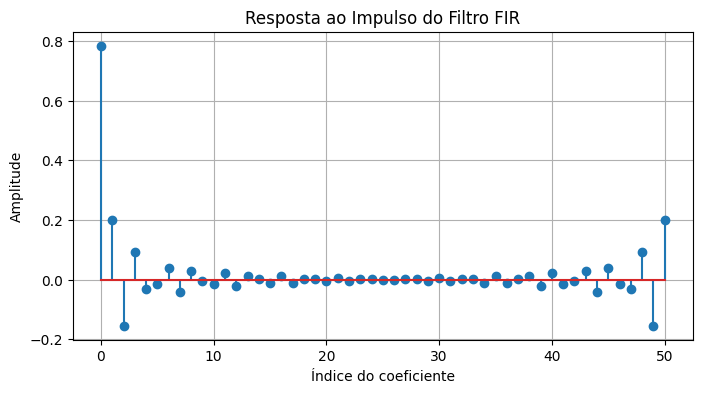

In [ ]:
from scipy.fft import ifft

N = 51  # Número de coeficientes
desired_response = np.concatenate((np.ones(20), np.zeros(N - 40), np.ones(20)))
h = np.real(ifft(desired_response))  # Obtendo a resposta ao impulso FIR

# Plotando a resposta ao impulso
plt.figure(figsize=(8, 4))
plt.stem(h)
plt.title('Resposta ao Impulso do Filtro FIR')
plt.xlabel('Índice do coeficiente')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

## 4. Método de Parks-McClellan (Remez Exchange)

Esse método busca otimizar a resposta do filtro FIR minimizando o erro máximo entre a resposta ideal e a obtida. É amplamente utilizado para projetar filtros que oferecem um equilíbrio eficiente entre desempenho e complexidade.

### Vantagens:
- Garante um erro mínimo nas bandas de passagem e rejeição.
- Permite um controle preciso da ondulação em ambas as bandas.

---

### Implementação em Python:

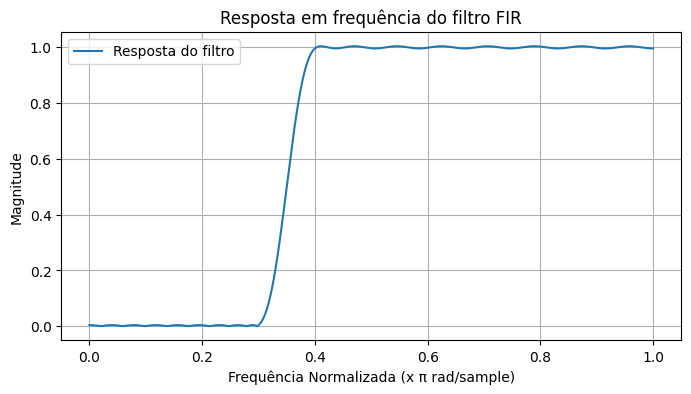

In [ ]:
from scipy.signal import remez

num_taps = 51  # Número de coeficientes do filtro
bands = [0, 0.3, 0.4, 1.0]  # Bandas de frequência normalizadas
desired = [0,1]  # Respostas desejadas
b = remez(num_taps, bands, desired,fs=2)

#show b
w, h = freqz(b, worN=8000)
plt.figure(figsize=(8, 4))
plt.plot(w / np.pi, abs(h), label='Resposta do filtro')
plt.title('Resposta em frequência do filtro FIR')
plt.xlabel('Frequência Normalizada (x π rad/sample)')
plt.ylabel('Magnitude')
plt.grid()
plt.legend()
plt.show()

## 5. Comparação entre Métodos

| Método                | Vantagens                                      | Desvantagens |
|----------------------|--------------------------------|--------------|
| Método das Janelas  | Simples, fácil de implementar | Menos flexível no ajuste fino da resposta |
| Amostragem em Frequência | Permite especificar diretamente a resposta desejada | Pode causar distorções na transição de banda |
| Parks-McClellan | Otimiza a resposta do filtro, minimizando erros | Computacionalmente mais exigente |

---

## Conclusão

O desenvolvimento de filtros FIR requer a escolha do método mais adequado para atender aos requisitos específicos. Abordagens baseadas em janelas são intuitivas e fáceis de aplicar, enquanto técnicas como Parks-McClellan garantem maior precisão. A decisão final deve levar em conta a complexidade computacional e as demandas da aplicação.
